<a href="https://colab.research.google.com/github/ayush0030/Data-Science-Project/blob/main/Age_and_Gender_Detection_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python


In [3]:
# Import required modules
import cv2 as cv
import math
import time
from google.colab.patches import cv2_imshow
# import argparse

def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

faceProto = "opencv_face_detector.pbtxt"
faceModel = "opencv_face_detector_uint8.pb"

ageProto = "age_deploy.prototxt"
ageModel = "age_net.caffemodel"

genderProto = "gender_deploy.prototxt"
genderModel = "gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

faceNet=cv.dnn.readNet(faceModel,faceProto)
ageNet=cv.dnn.readNet(ageModel,ageProto)
genderNet=cv.dnn.readNet(genderModel,genderProto)

padding = 20

def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        # print("Gender Output : {}".format(genderPreds))
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        print("Age Output : {}".format(agePreds))
        print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))

        label = "{},{}".format(gender, age)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Gender : Female, conf = 0.998
Age Output : [[3.0296120e-05 1.6272177e-05 2.4996040e-04 2.0417448e-03 9.7606224e-01
  4.6105692e-03 4.0207435e-03 1.2968106e-02]]
Age : (25-32), conf = 0.976


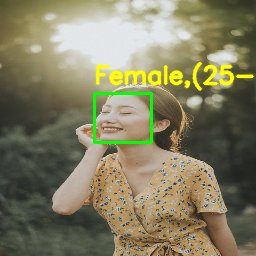

In [6]:
input = cv.imread("girl1.jpg")
resized = cv.resize(input, (256,256))
output = age_gender_detector(resized)
cv2_imshow(output)

Gender : Female, conf = 0.999
Age Output : [[7.8752673e-06 1.0054429e-04 4.4509128e-02 9.4973785e-01 5.4345415e-03
  1.8041984e-04 1.8776256e-05 1.0750020e-05]]
Age : (15-20), conf = 0.950


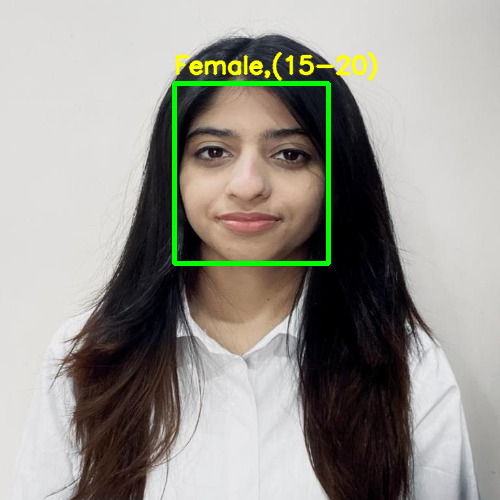

In [10]:
input = cv.imread("ishika_pic_formal.jpeg")
resized = cv.resize(input, (500,500))
output = age_gender_detector(resized)

cv2_imshow(output)

Gender : Male, conf = 1.000
Age Output : [[0.00252495 0.00685354 0.17826883 0.45001572 0.26405042 0.06645026
  0.02823445 0.00360164]]
Age : (15-20), conf = 0.450


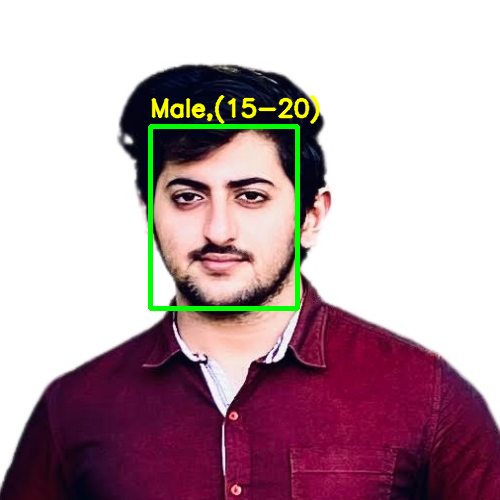

In [14]:
input = cv.imread("png - Copy (2).jpg")
resized = cv.resize(input, (500,500))
output = age_gender_detector(resized)

cv2_imshow(output)

Gender : Female, conf = 0.946
Age Output : [[3.1229050e-05 4.8347425e-05 2.2731941e-02 9.2026454e-01 5.1614739e-02
  4.6356954e-03 5.2880758e-04 1.4470129e-04]]
Age : (15-20), conf = 0.920


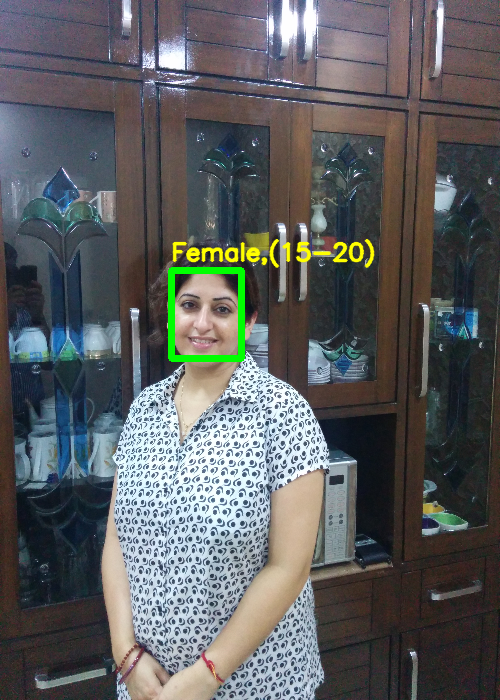

In [16]:
input = cv.imread("IMG_20140726_191624.jpg")
resized = cv.resize(input, (500,700))
output = age_gender_detector(resized)

cv2_imshow(output)